In [1]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn

model = fasterrcnn_resnet50_fpn(pretrained=True,progress=False)
model.eval()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [2]:
import cv2

In [3]:
path  = r"F:\New folder (2)\1288540.jpg"
target ='car'

In [4]:
from torchvision.transforms import transforms
img = cv2.imread(path)
tensor = transforms.ToTensor()(img)
tensor = tensor.unsqueeze(0)
tensor.shape

torch.Size([1, 3, 1080, 1920])

In [5]:
pred =  model(tensor)
pred

[{'boxes': tensor([[ 578.9601,  350.9377, 1639.5247,  878.8624],
          [ 860.3636,  404.7848,  897.2159,  487.7522],
          [ 856.2272,  401.0388,  922.8594,  503.5157],
          [ 717.8544,  364.9668, 1658.2040,  878.8779]],
         grad_fn=<StackBackward0>),
  'labels': tensor([3, 1, 1, 9]),
  'scores': tensor([0.9613, 0.3024, 0.2162, 0.1022], grad_fn=<IndexBackward0>)}]

In [6]:
coco_labels= ['__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [7]:
pred  = pred[0]


In [8]:
result = []

for box,label,score in zip(pred['boxes'],pred['labels'],pred['scores']):
    if score > 0.7 and coco_labels[label.item()]==target:
        result.append(box.detach().numpy())
        

In [9]:
result

[array([ 578.96014,  350.93774, 1639.5247 ,  878.86237], dtype=float32)]

In [10]:
from transformers import SamModel ,SamProcessor

model = SamModel.from_pretrained("facebook/sam-vit-base")
processor = SamProcessor.from_pretrained("facebook/sam-vit-base")

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
result = [result]
result

[[[array([ 578.96014,  350.93774, 1639.5247 ,  878.86237], dtype=float32)]]]

In [49]:
inputs = processor(img,input_boxes= result,return_tensors="pt")

outputs = model(**inputs)



: 

In [23]:
masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu())
scores = outputs.iou_scores

In [44]:
def func(mask):
    mask=mask.detach().numpy()[0]
    mask = mask.astype('uint8')
    transpose = mask.transpose(1,2,0)
    print(transpose.shape)
    return transpose

In [48]:
masks

[tensor([[[[False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           ...,
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False]],
 
          [[False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           ...,
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False]],
 
          [[False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           [False, False, False,  ..., False, False, False],
           ...,
           [False, False, False

{'boxes': tensor([[ 578.9601,  350.9377, 1639.5247,  878.8624],
         [ 860.3636,  404.7848,  897.2159,  487.7522],
         [ 856.2272,  401.0388,  922.8594,  503.5157],
         [ 717.8544,  364.9668, 1658.2040,  878.8779]],
        grad_fn=<StackBackward0>),
 'labels': tensor([3, 1, 1, 9]),
 'scores': tensor([0.9613, 0.3024, 0.2162, 0.1022], grad_fn=<IndexBackward0>)}

(1080, 1920, 3)


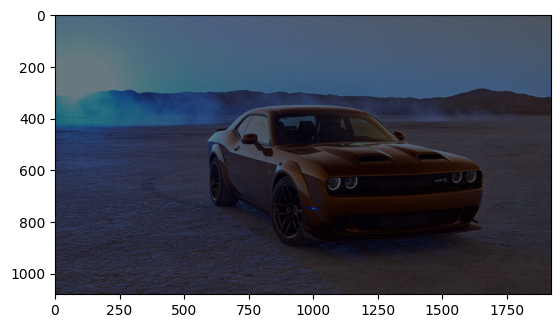

In [46]:
from matplotlib import pyplot as plt

ax  = plt.gca()
ax.imshow(img)
for mask in masks:
    mask = func(mask)
    ax.imshow(mask,alpha=0.5)
plt.show()